In [2]:
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import nltk
from collections import Counter
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lgdxschool2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
contain_word = ["가로", "깊이", "사이즈", "세로", "cm", "mm", "냉장고장","높이", "폭", "부피", "측정", "실측", "공간", "위치", "배치", 
               "설치공간", "배선", "콘센트", "전원", "연결", "제약", "제한", "문제", "트러블", "조정", "조립", "위치조정", 
               "기사", "설치사", "방문", "방문비", "유료", "무료", "서비스", "지원", "고객지원", "지원서비스", "요금","연장선", 
               "설계", "조립도구", "설치장소", "설치환경", "설치조건","전력", "선호", "제한사항", "공간제약", "배치문제", "배치이슈","불편", 
               "어려움", "불만", "만족", "추천", "비추천", "편리함", "불편함", "좁은 공간", "높은 곳", "전력 공급", "배선 문제","인치" ]

In [34]:
df  = pd.read_csv('./data/merged_data.csv')
df.head()

,Review
0,엘지트롬 FX23VN 23키로 세탁기 사용 중인데 직렬설치 가능한가요?
1,"전원 연결시 콘센트에 코드를 바로 꽂지 않고, 리드선을 연결해서 코드를 꽂아도 안전..."
2,건조기 자체에 통살균세척기능은 원래 없나요??
3,사이즈 알려주세요
4,폐가전무상수거 서비스있는데 혹시 2개도수거되나요..? 제가사는건 건조기인데 건조기 ...


In [36]:
df.shape

(3866, 1)

In [38]:
df_tolist = df.values.tolist()
df_tolist[:8]

[['엘지트롬 FX23VN 23키로 세탁기 사용 중인데 직렬설치 가능한가요?'],
 ['전원 연결시 콘센트에 코드를 바로 꽂지 않고, 리드선을 연결해서 코드를 꽂아도 안전이나 사용상 문제가 없나요?'],
 ['건조기 자체에 통살균세척기능은 원래 없나요??'],
 ['사이즈 알려주세요'],
 ['폐가전무상수거 서비스있는데 혹시 2개도수거되나요..? 제가사는건 건조기인데 건조기 세탁기 두개 수거도 가능한가해서요'],
 ['방에 설치하면 건조기 작동때 창열어서 통풍시키며 사용해야하나요?'],
 ['WF19T6000KW 19kg 이 제품 위에 설치 가능한가요?'],
 ['구매했는데 바로 취소 됐어요 지금도 구매가능한 상태지만 다시 구매누르면 취소 안당하나요?']]

In [40]:
import numpy as np
df_tolist= np.array(df_tolist).flatten().tolist()
df_tolist[:8]

['엘지트롬 FX23VN 23키로 세탁기 사용 중인데 직렬설치 가능한가요?',
 '전원 연결시 콘센트에 코드를 바로 꽂지 않고, 리드선을 연결해서 코드를 꽂아도 안전이나 사용상 문제가 없나요?',
 '건조기 자체에 통살균세척기능은 원래 없나요??',
 '사이즈 알려주세요',
 '폐가전무상수거 서비스있는데 혹시 2개도수거되나요..? 제가사는건 건조기인데 건조기 세탁기 두개 수거도 가능한가해서요',
 '방에 설치하면 건조기 작동때 창열어서 통풍시키며 사용해야하나요?',
 'WF19T6000KW 19kg 이 제품 위에 설치 가능한가요?',
 '구매했는데 바로 취소 됐어요 지금도 구매가능한 상태지만 다시 구매누르면 취소 안당하나요?']

In [42]:
df_contain = []

for i in df_tolist:
    if any(word in i for word in contain_word):  # 관련 단어가 들어가 있으면 리스트에 추가
        df_contain.append(i)

In [44]:
df_contain[:8]

['전원 연결시 콘센트에 코드를 바로 꽂지 않고, 리드선을 연결해서 코드를 꽂아도 안전이나 사용상 문제가 없나요?',
 '사이즈 알려주세요',
 '폐가전무상수거 서비스있는데 혹시 2개도수거되나요..? 제가사는건 건조기인데 건조기 세탁기 두개 수거도 가능한가해서요',
 '전원 켰는데 시간쪽엔 dr이라고 깜박 거리고 전원 외에는 아무것도 터치가 안되는 것 같은데 왜 이런건가요?',
 '제품 사이즈가 궁금해요',
 '저희집이 옛날것 통돌이 세탁기를 사용하는데 바로옆에다 두고 사용하여도 문제 없나요? 저흰 직렬 ㆍ 필요없고 말 그대로 건조기만 필요해서요',
 '가로 세로 높이가 안나와있네요 알려주세요!',
 '지금 사용하는 드럼세탁기가 F21WDU 기종으로 사이즈가 가로700x세로990x깊이770인데 건조기는 가로세로는 동일한것 같은데 깊이가820 차이가 있습니다. 직렬설치가 가능할까요? 설치할 폭과 높이는 여유가 있습니다.']

In [103]:
len(df_contain)

1194

In [46]:
df_contain_token = [token for doc in df_contain for token in word_tokenize(doc)]

In [48]:
df_contain_token[:8]

['전원', '연결시', '콘센트에', '코드를', '바로', '꽂지', '않고', ',']

## 데이터 클렌징

In [52]:
p = re.compile("[!.,?;)(*:ㅡㅋㅎㅇㅠㅜ\\^~a-zA-Z]+")
df_clean = []

for doc in tqdm(df_contain_token):
    if p.search(doc):
        continue
    df_clean.append(doc)

df_clean[:8]

100%|███████████████████████████████████████████████████████████████████████| 20045/20045 [00:00<00:00, 2303356.72it/s]


['전원', '연결시', '콘센트에', '코드를', '바로', '꽂지', '않고', '리드선을']

## 일단 형태소 분석 없이 워드클라우드 진행

In [99]:
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

mask_sam = np.array(Image.open('./mask-cloud.png'))

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in Counter(df_clean).most_common(70)}
freq_dict

{'설치': 192,
 '세탁기': 124,
 '가능한가요': 115,
 '냉장고': 115,
 '안녕하세요': 91,
 '가능할까요': 78,
 '기존': 73,
 '가로': 69,
 '따로': 68,
 '되나요': 63,
 '그리고': 61,
 '어떻게': 60,
 '수': 60,
 '있는': 58,
 '궁금합니다': 58,
 '설치가': 55,
 '있나요': 55,
 '혹시': 53,
 '이': 53,
 '제품': 51,
 '있는데': 46,
 '건조기': 43,
 '사이즈가': 43,
 '합니다': 42,
 '하는데': 41,
 '기사님이': 40,
 '사이즈': 39,
 '아니면': 39,
 '문의드립니다': 38,
 '세로': 37,
 '입니다': 37,
 '있을까요': 36,
 '수거': 36,
 '높이': 34,
 '폭이': 34,
 '사다리차': 34,
 '높이가': 33,
 '배송': 33,
 '부탁드립니다': 32,
 '폐가전': 31,
 '기사님': 30,
 '다시': 30,
 '현재': 29,
 '맞나요': 29,
 '있습니다': 28,
 '2': 28,
 '구매': 28,
 '제가': 28,
 '오늘': 28,
 '지금': 27,
 '문의': 27,
 '무료': 27,
 '알려주세요': 26,
 '가능': 26,
 '미리': 26,
 '기존에': 26,
 '좀': 26,
 '더': 26,
 '1': 25,
 '인데': 25,
 '바로': 24,
 '다': 24,
 '다른': 24,
 '집에': 24,
 '될까요': 24,
 '정도': 23,
 '가능한지': 23,
 '위에': 23,
 '삼성': 23,
 '알고': 22}

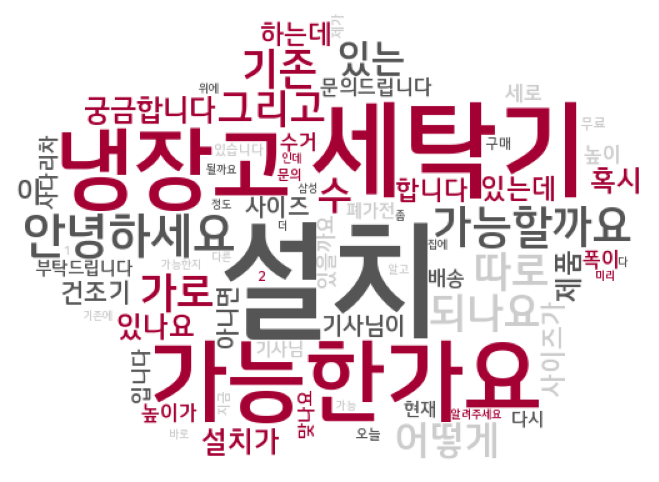

In [101]:
import random

def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

wc_rs = wc.generate_from_frequencies(freq_dict)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [109]:
count_word_df = pd.DataFrame(list(freq_dict.items()), columns=['Word', 'Frequency'])
count_word_df

,Word,Frequency
0,설치,192
1,세탁기,124
2,가능한가요,115
3,냉장고,115
4,안녕하세요,91
...,...,...
65,정도,23
66,가능한지,23
67,위에,23
68,삼성,23


In [111]:
count_word_df.to_csv("count_word_df_태블로용.csv", encoding='euc-kr')

### 형태소 분석 진행

In [59]:
from kiwipiepy import Kiwi
Kiwi = Kiwi()

In [61]:
qna_clean_morphs = [] # 전체리스트 생성

for doc in tqdm(df_clean):
    doc_merge = ''.join(doc)
    doc_merphs = Kiwi.tokenize(doc_merge)  
    morphs_list = []
    for t in doc_merphs:
        if t.tag in ["NNG","VV","VA"]: # 일반명사, 동사, 형용사만 추출
            morphs_list.append(t.form)
    qna_clean_morphs.append(' '.join(morphs_list))

100%|██████████████████████████████████████████████████████████████████████████| 16301/16301 [00:01<00:00, 8408.40it/s]


In [63]:
qna_clean_morphs[:8]

['전원', '연결', '콘센트', '코드', '', '꽂', '', '리드 선']

In [65]:
len(qna_clean_morphs)

16301

In [75]:
token_list_morphs = [t for doc in qna_clean_morphs for t in word_tokenize(doc)]
counter_morphs = Counter(token_list_morphs)

wc = WordCloud(background_color='white', random_state=20, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in counter_morphs.most_common(70)}
freq_dict

{'설치': 748,
 '하': 591,
 '가능': 458,
 '되': 424,
 '있': 412,
 '냉장고': 227,
 '세탁기': 226,
 '기사': 210,
 '구매': 196,
 '제품': 193,
 '배송': 186,
 '드리': 185,
 '없': 178,
 '연결': 174,
 '사용': 172,
 '무료': 145,
 '주문': 139,
 '기존': 137,
 '수거': 134,
 '사이즈': 127,
 '문의': 115,
 '문': 112,
 '가로': 108,
 '같': 93,
 '안녕': 92,
 '맞': 92,
 '쓰': 91,
 '때': 85,
 '건조기': 84,
 '공간': 84,
 '정도': 83,
 '추가': 82,
 '방문': 82,
 '집': 81,
 '전': 80,
 '나오': 77,
 '주': 77,
 '보': 75,
 '궁금하': 74,
 '높이': 74,
 '폭': 72,
 '층': 72,
 '알': 71,
 '들어가': 69,
 '비용': 69,
 '연락': 69,
 '부탁': 66,
 '수': 65,
 '오': 64,
 '벽걸이': 64,
 '직렬': 62,
 '세로': 60,
 '위': 58,
 '지원': 57,
 '전화': 56,
 '나': 56,
 '상품': 56,
 '후': 55,
 '문제': 54,
 '사다리차': 54,
 '가': 52,
 '키트': 52,
 '무상': 51,
 '필요': 50,
 '티비': 48,
 '알리': 47,
 '확인': 47,
 '고장': 47,
 '크기': 46,
 '답변': 46}

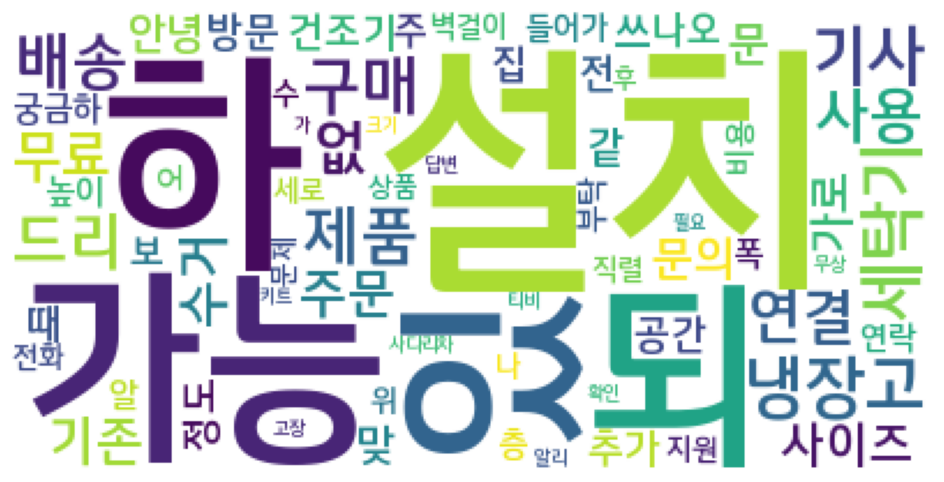

In [77]:
wc_rs = wc.generate_from_frequencies(freq_dict)
plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()